In [1]:
# Business Goal of the Assignment:
# You are required to model the demand for shared bikes with the available independent variables. 
# It will be used by the management to understand how exactly the demands vary with different features. 
# They can accordingly manipulate the business strategy to meet the demand levels and meet the customer 
# expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# The steps to be followed in this exercise are as follows:
# 1.Reading, understanding and visualizing the data
# 2.Preparing the data for model training (train-test split, rescaling)
# 3.Training the model
# 4.Residual analysis
# 5.Prediction and evaluation of the test set

# Step 1: Reading and Understanding of data and visualizing the data

# Importing the required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
# Reading the Data
df = pd.read_csv("day.csv")
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/01/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/01/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/01/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/01/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/01/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape of the Dataset
df.shape

(730, 16)

In [4]:
# Description of the Data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Info of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking for any Null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

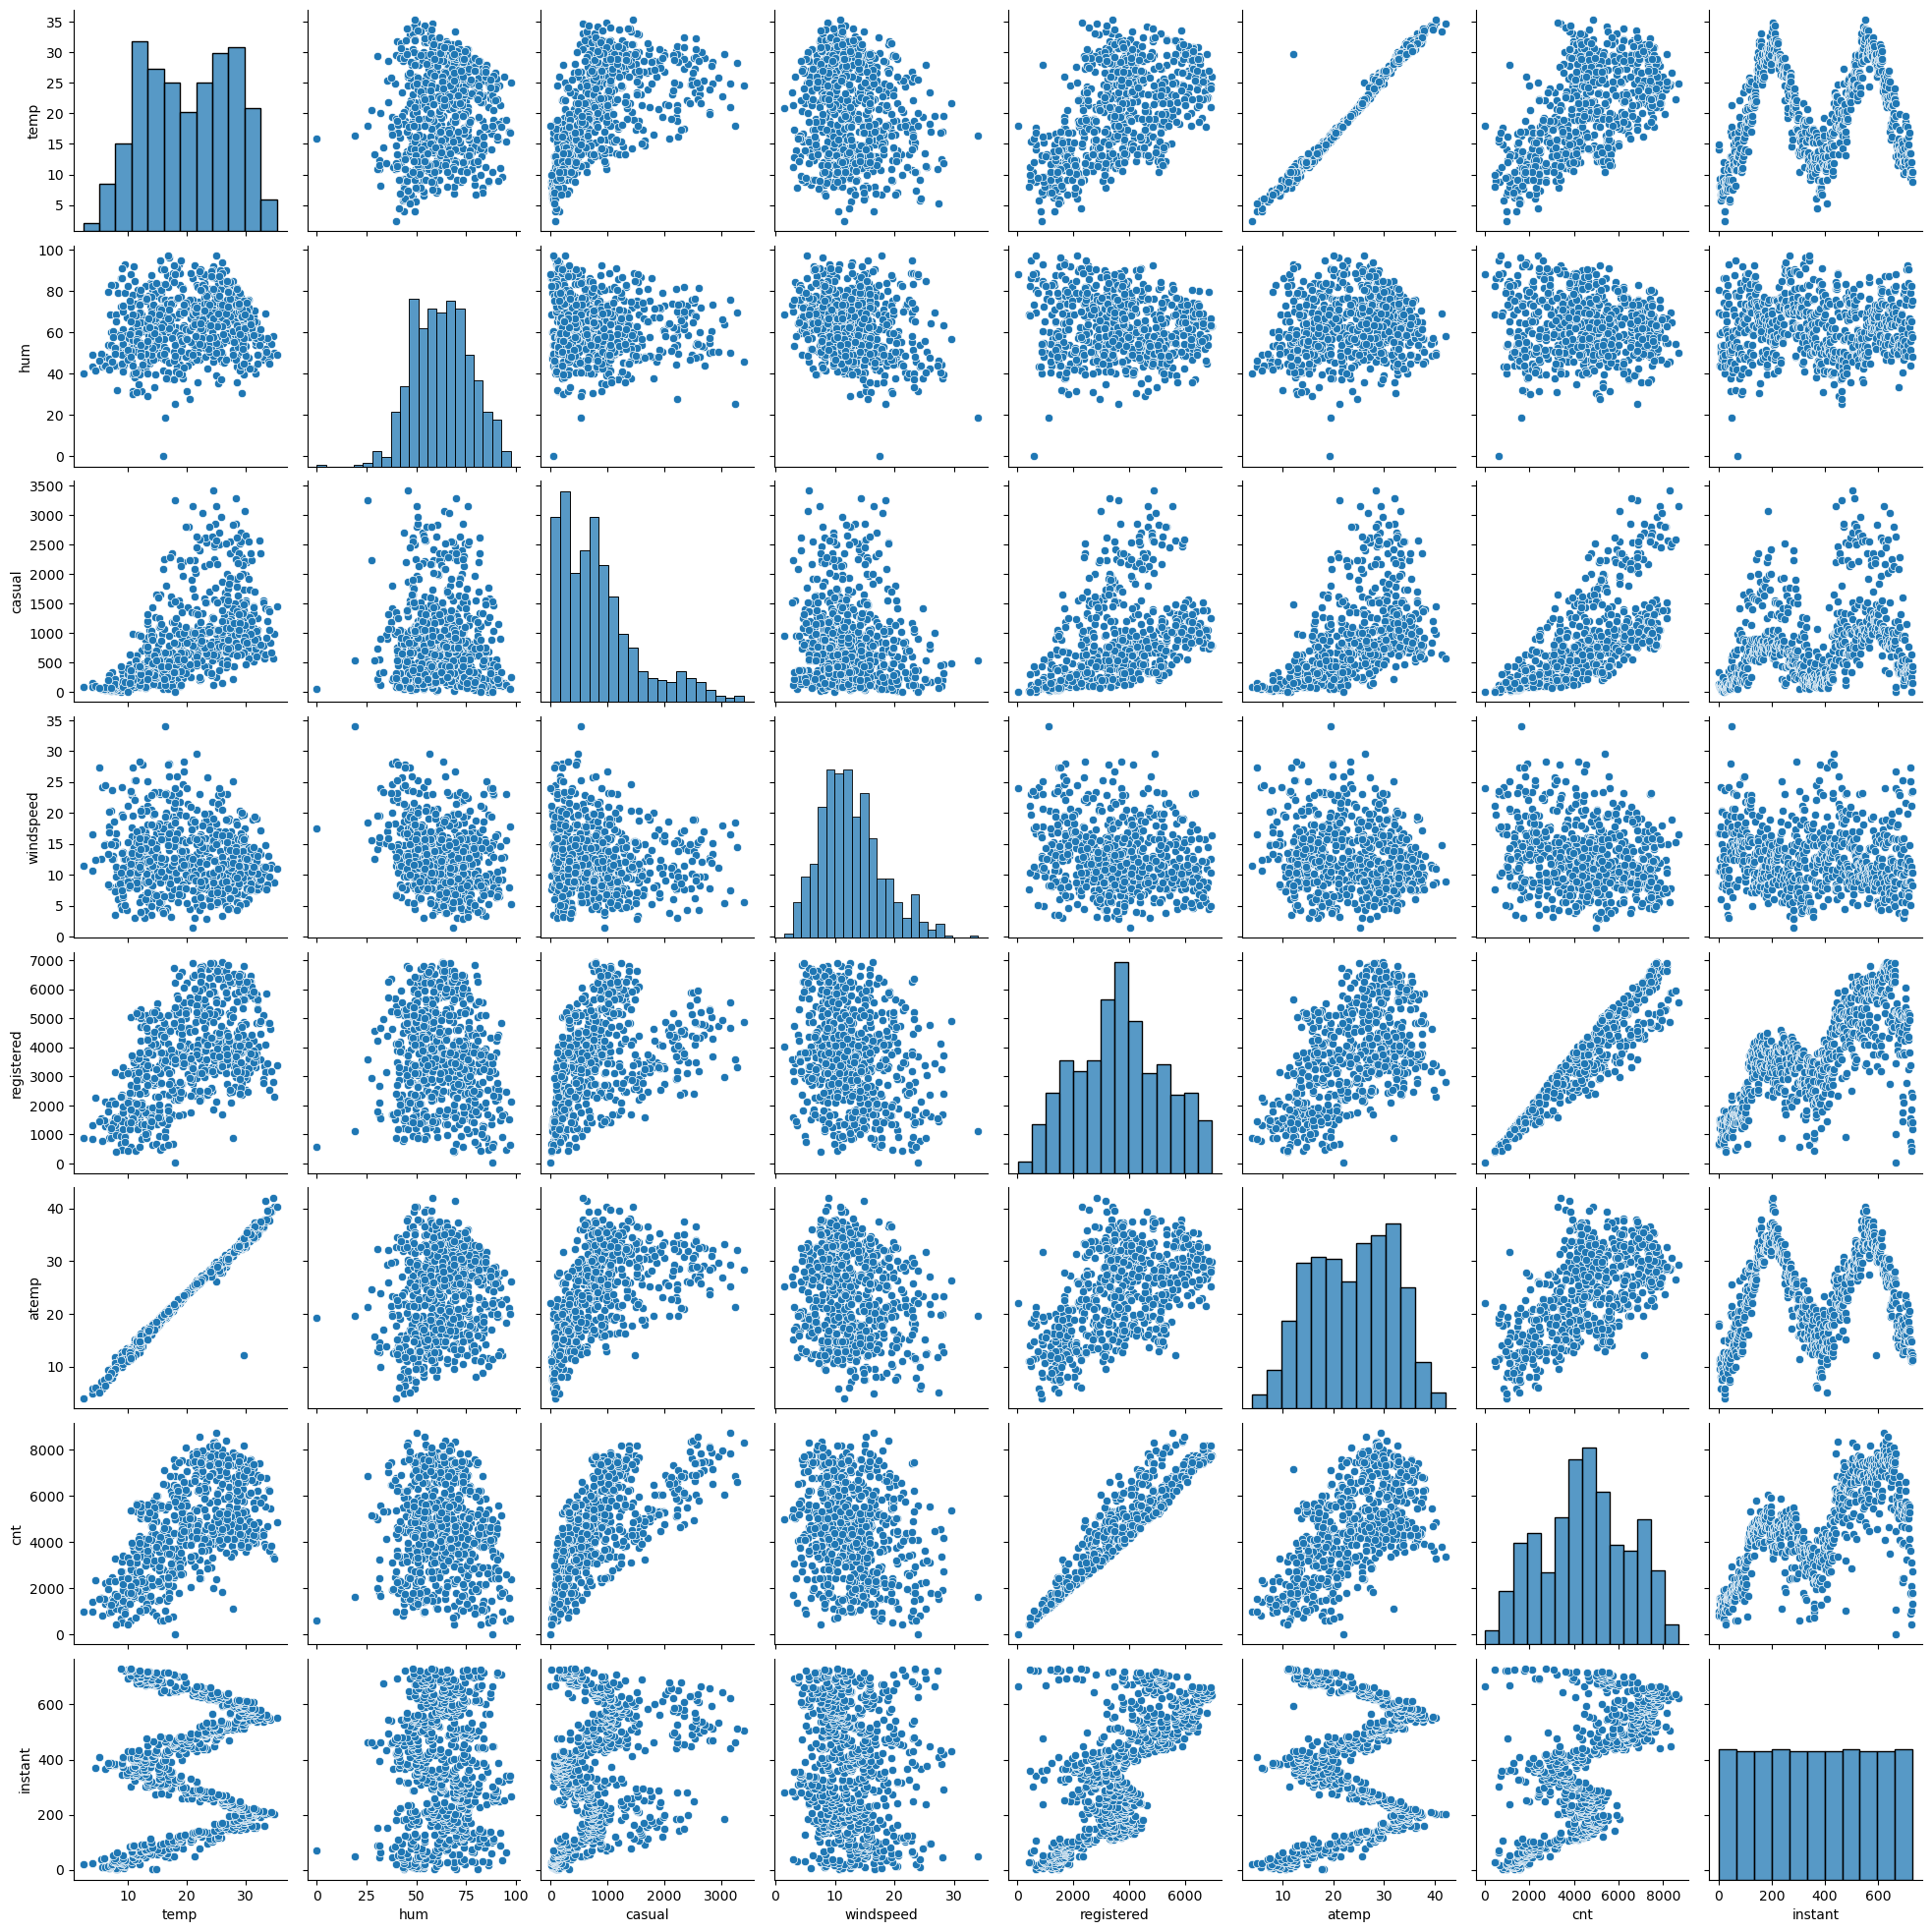

In [7]:
# Visualizing the numeric variables of the data using pairplot 
sns.pairplot(df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

In [ ]:
# From the above graphs we can infer that, there is strong correlation between the count variable and temperature

In [8]:
# Mapping categorical variables with their subcategories to help with visualization analysis 
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/01/2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/01/2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/01/2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/01/2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/01/2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


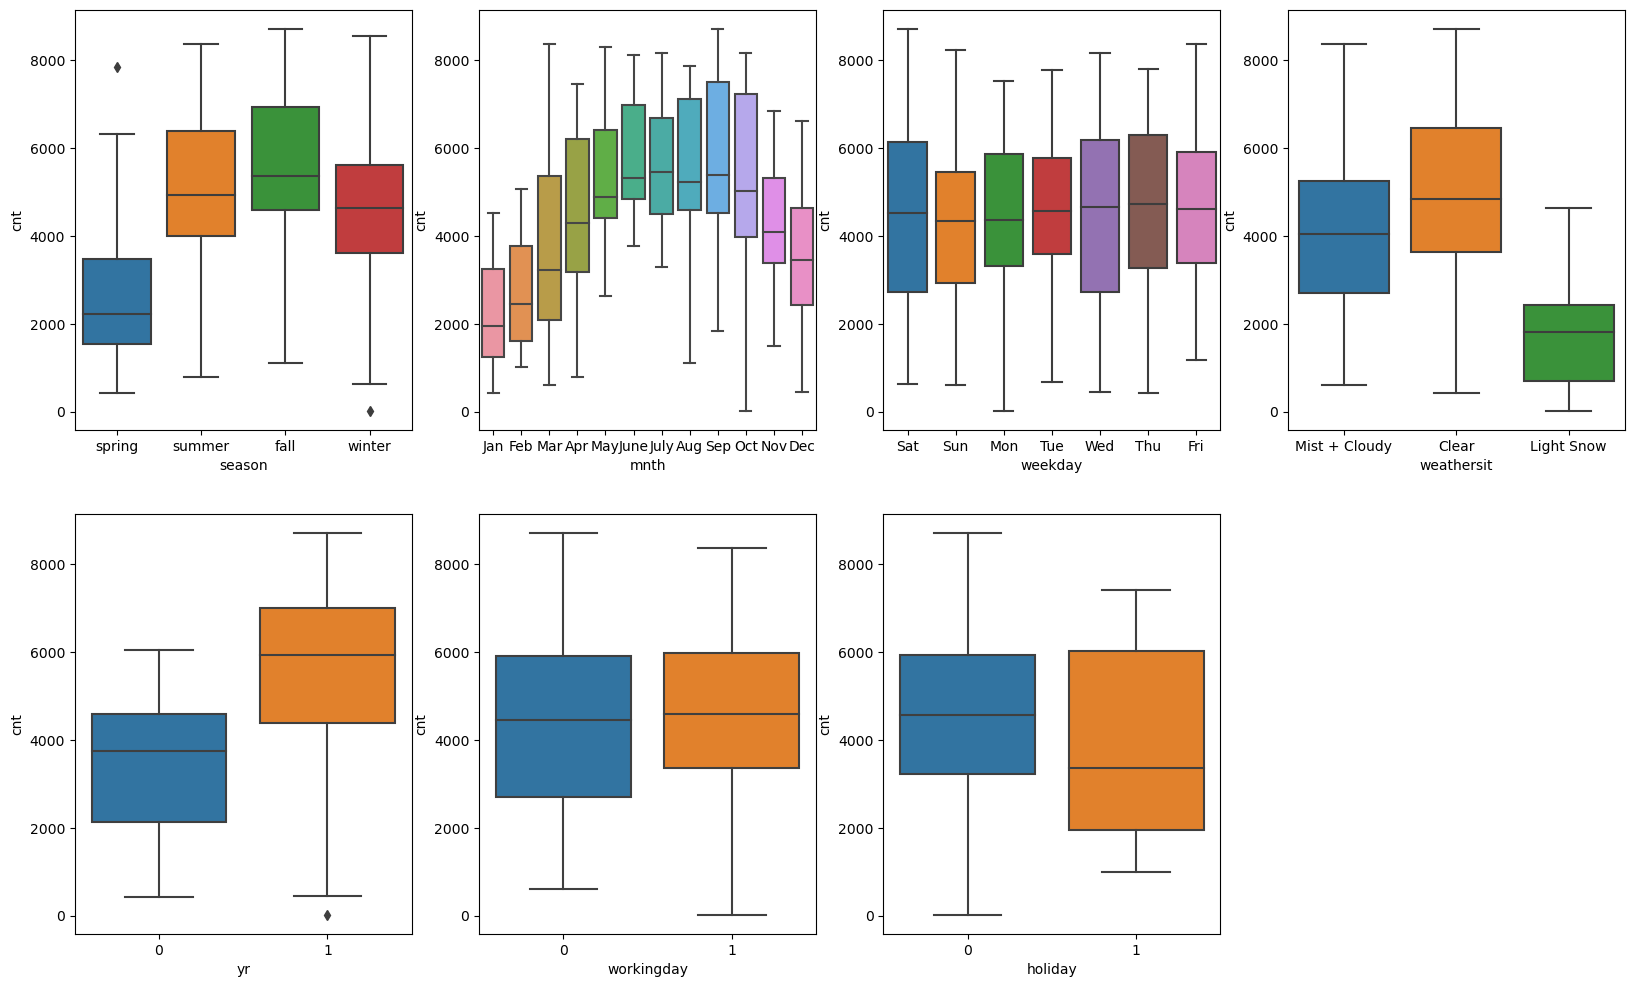

In [9]:
# Visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

In [ ]:
# Some of the observations from the plots above are as follows:
# 1.People are more likely to rent bikes in the summer and the fall season
# 2.Bike rental rates are the most in September and October
# 3.Saturday, Wednesday and Thursday are the days where more bikes are rented
# 4.Most bike rentals take place in the clear weather
# 5.More bikes were rented in 2019
# 6.There is no big difference in bike rentals on whether it's a working day or not
# 7.More Bikes were rented on holidays

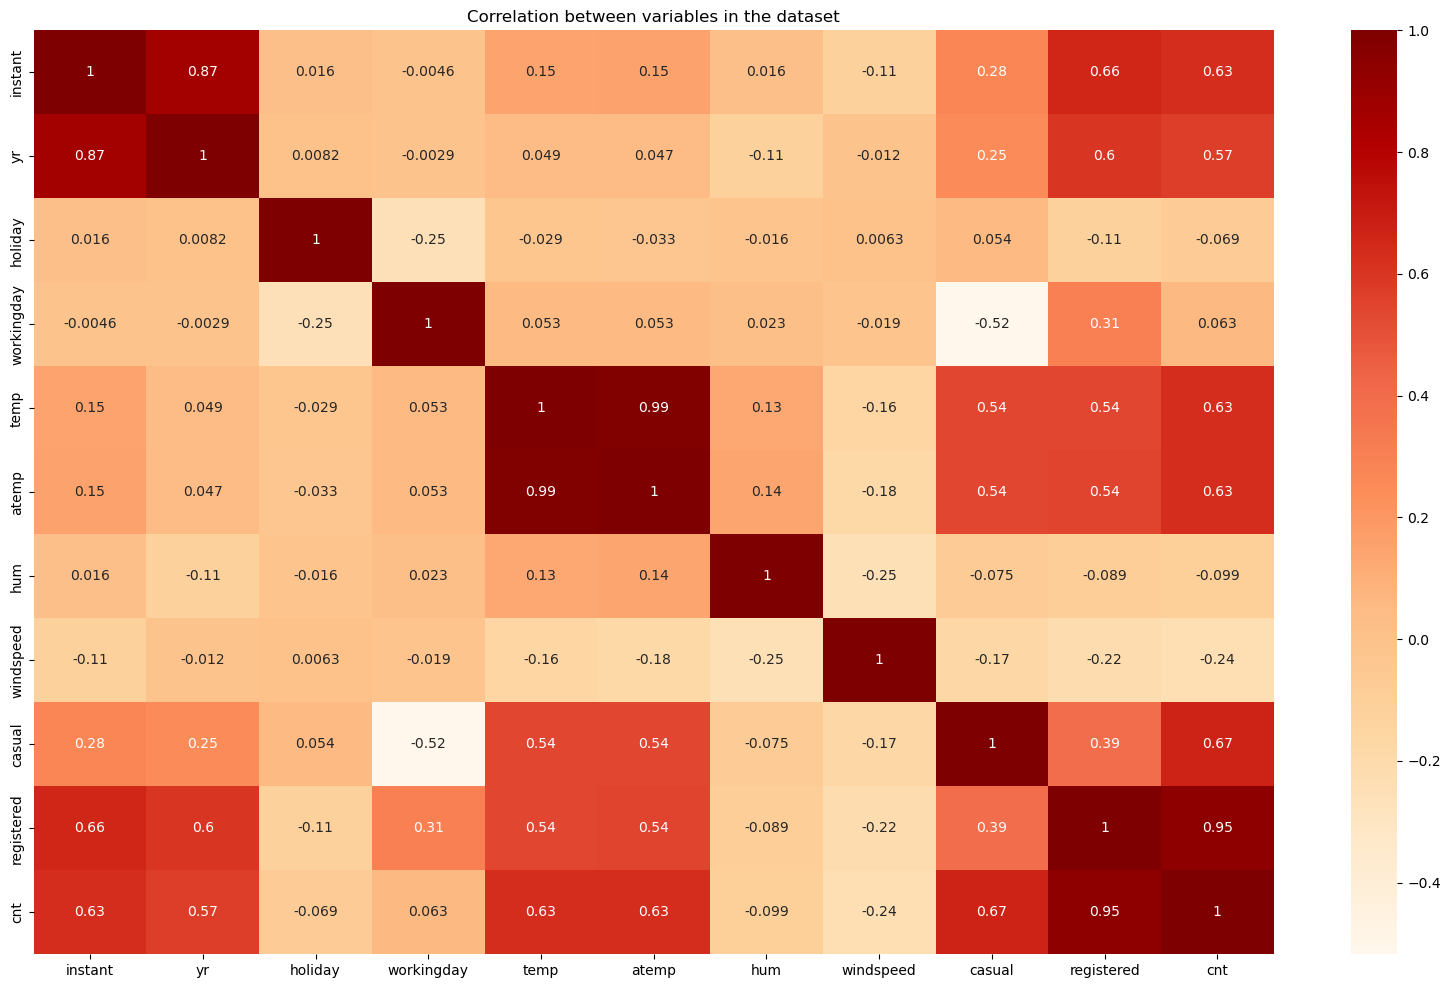

In [10]:
# Making a heatmap to showcase correlation between the variables and decide whether we can perform linear regression on the dataset
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='OrRd', annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

In [ ]:
# We can infer that, there are several variables correlated to count variable (cnt) such as registered, 
# casual, temp, atemp, yr, we can thereby conduct a linear regresssion model

In [11]:
#dropping the un-required variables from the dataset 
#dropping the variables atemp, instant, dteday, casual, registered as they are not needed for the analysis 
#atemp is not needed as temp is already being used, dteday and casual are also not required for regression analysis 

df = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [12]:
df.shape

(730, 11)

In [13]:
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [14]:
#creating dummy variables for the variables of month, weekday, weathersit, seasons
month = pd.get_dummies(df.mnth, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)
season = pd.get_dummies(df.season, drop_first=True)
#adding the dummy variables to the original dataframe
df = pd.concat([df,month, weekday, weathersit, season], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [15]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,6.765000,53.5833,17.875868,959,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,0,0,5.671653,43.4167,24.250650,822,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  July           730 non-null    uint8  
 12  June           730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

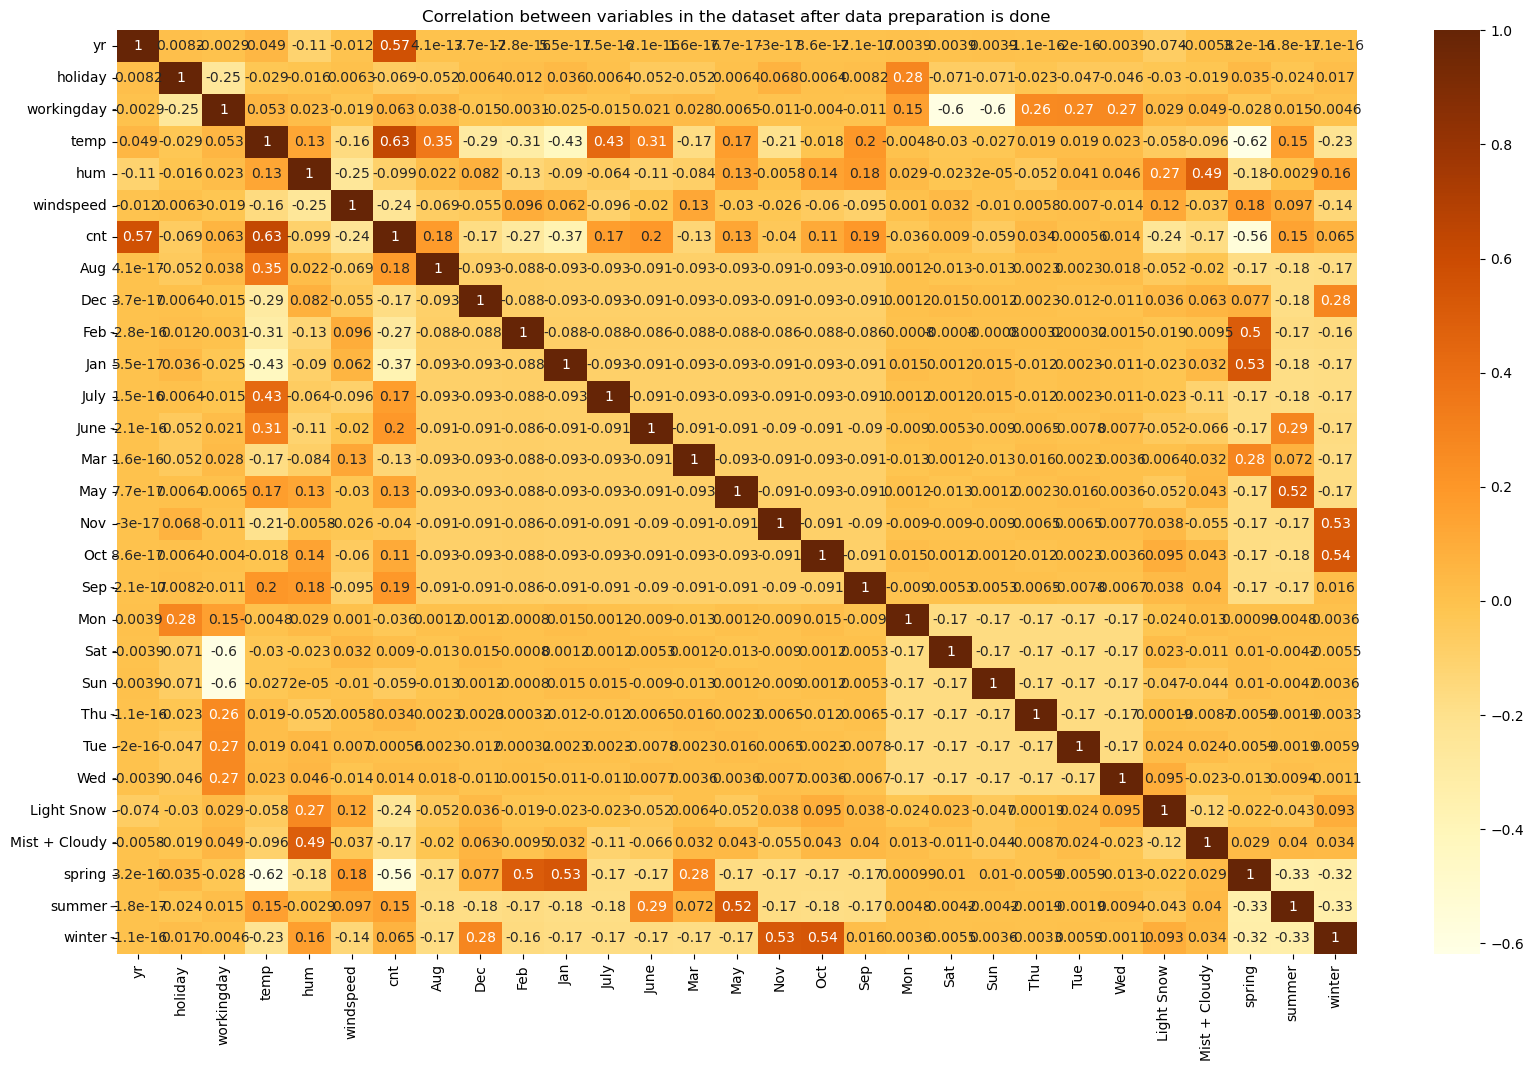

In [17]:
#making a heatmap to showcase correlation between the new variables 
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True)
plt.title('Correlation between variables in the dataset after data preparation is done')
plt.show()

In [ ]:
# We can infer that the Count is highly correlated with Temp and year.

In [18]:
# Step 2: Preparing the data for model training (train-test split, rescaling)

#splitting the dataset into train and test sets
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
#checking the shape of the training dataset
df_train.shape

(510, 29)

In [19]:
#checking the shape of the test dataset
df_test.shape

(220, 29)

In [20]:
# Scaling the Variables
#we have to rescale the variables like hum, temp, windspeed, cnt as they have large values as compared to the other variables of the dataset
#we have to normalize these values using the scaler.fit_transform() 
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

#checking the normalized values of the train set after performing scaling 
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


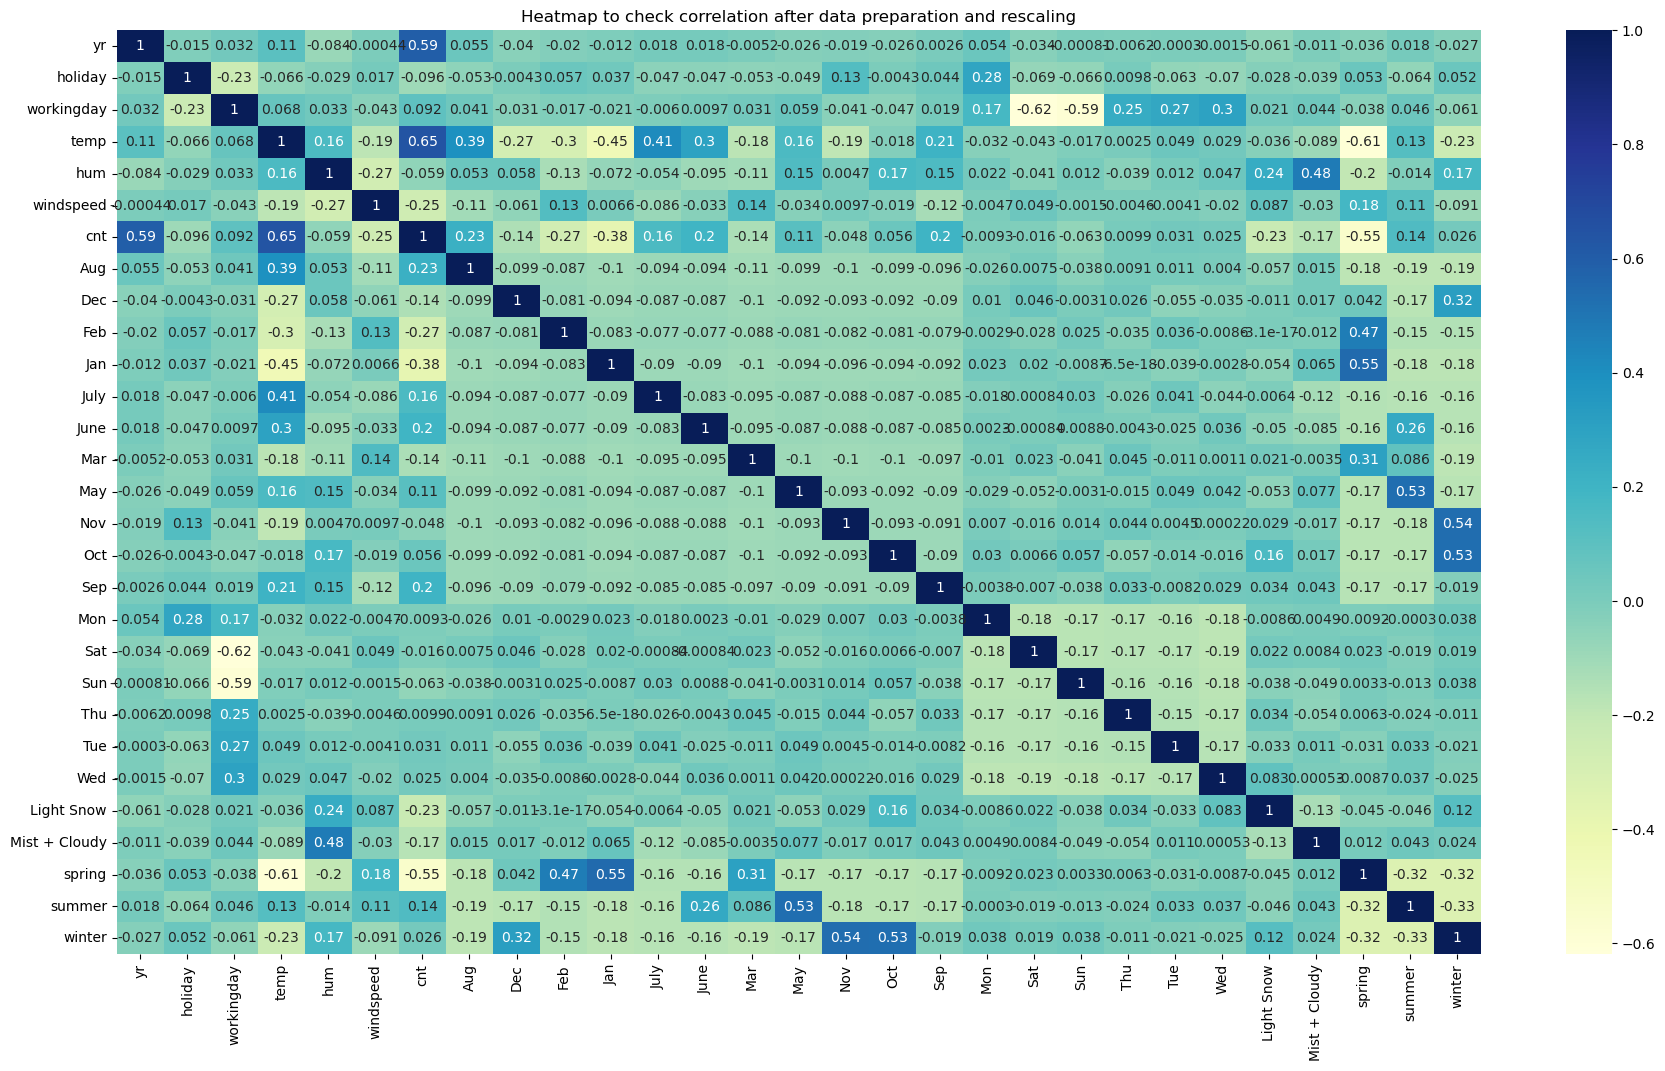

In [21]:
# checking the correlation coefficients to see which variables are highly correlated post data preparation and rescaling

plt.figure(figsize = (22, 12))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
plt.title('Heatmap to check correlation after data preparation and rescaling')
plt.show()

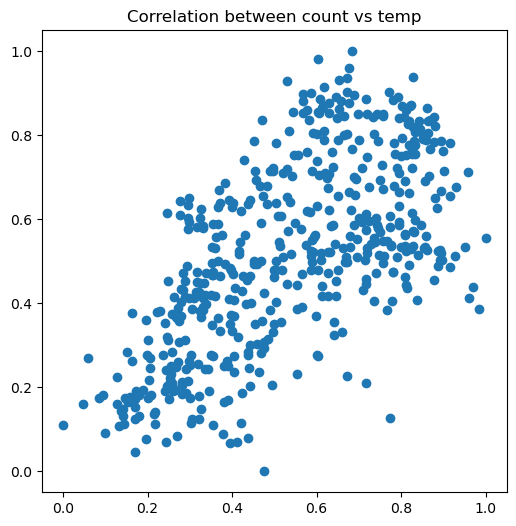

In [22]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

In [23]:
# Step 3 : Training the Model
#building our first model using the variable temp
#preparing the variables for model building 

y_train = df_train.pop('cnt')
X_train = df_train

In [24]:
y_train.head(5)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [25]:
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [26]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [27]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.46e-61
Time:                        13:10:21   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

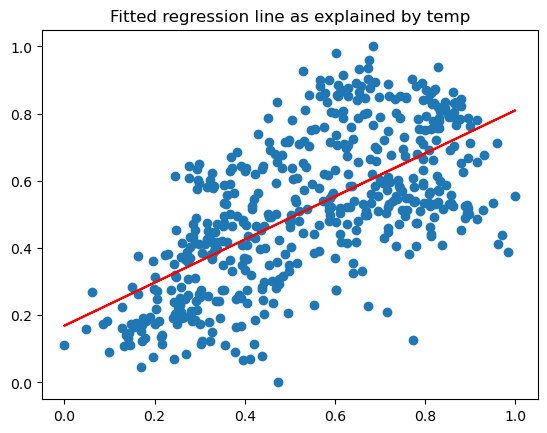

In [28]:
# R-squared is .416 which means 41% of the variance in the count quantity is explained by temp
# P value for temp is also 0 that means Temp is very much positively related with cnt.

#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [29]:
#adding another variable thus performing multiple regression 
#adding variable yr and checking to see if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [30]:
#checking summary with temp and yr as selected variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          3.34e-130
Time:                        14:01:40   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# R squared value is now 0.692, which is improved.
#Now, adding all variables and finding out the R-squared values
# checking all the variables in our dataset
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [32]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)

#create third model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [33]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          3.00e-181
Time:                        14:04:05   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.46e+16
================================================================

In [ ]:
# R squared value is now increased to 0.853.


In [34]:
#Using RFE:
#We have found out the R-squared values and the best fit lines using the manual approach for feature selection. 
#We will now using the automated approach for selecting the values required for building the most optimized models and 
#dropping the values which are redundant for our model building approach. 
#We will now use RFE for automated approach, along with VIF to determine the variables to drop.

#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

#checking the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 13),
 ('Feb', False, 10),
 ('Jan', True, 1),
 ('July', False, 14),
 ('June', False, 5),
 ('Mar', False, 6),
 ('May', False, 4),
 ('Nov', False, 8),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 9),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', False, 3),
 ('summer', True, 1),
 ('winter', True, 1)]

In [35]:
#getting the selected feature variables in one one variable
true_rfe = X_train.columns[rfe.support_]
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Aug', 'Jan',
       'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'summer', 'winter'],
      dtype='object')

In [36]:
#building model using selected RFE variables
#creating training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.172681
yr               0.229871
holiday         -0.023340
workingday       0.076845
temp             0.515579
hum             -0.160306
windspeed       -0.187902
Aug              0.050370
Jan             -0.037397
Sep              0.116986
Sat              0.085805
Sun              0.033371
Light Snow      -0.244850
Mist + Cloudy   -0.056483
summer           0.096690
winter           0.137466
dtype: float64

In [37]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          1.01e-191
Time:                        14:12:33   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1727      0.023      7.601      0.000       0.128       0.217
yr                0.2299      0.008     28.744      0.000       0.214       0.246
holiday          -0.0233      0.021     -1.123      0.262      -0.064       0.017
workingday        0.0768      0.009      8.650      0.000       0.059       0.094
temp              0.5156      0.024     21.197      0.000       0.468       0.563
hum              -0.1603      0.037     -4.329      0.000      -0.233      -0.088
windspeed        -0.1879      0.025     -7.411      0.000      -0.238      -0.138
Aug               0.0504      0.016      3.133      0.002       0.019       0.082
Jan              -0.0374      0.017     -2.164      0.031      -0.071      -0.003
Sep               0.1170      0.016      7.317      0.000       0.086       0.148
Sat               0.0858      0.011      7.789      0.000       0.064       0.107
Sun               0.0334      0.012      2.878      0.004       0.011       0.056
Light Snow       -0.2449      0.026     -9.423      0.000      -0.296      -0.194
Mist + Cloudy    -0.0565      0.010     -5.455      0.000      -0.077      -0.036
summer            0.0967      0.011      8.705      0.000       0.075       0.119
winter            0.1375      0.011     11.978      0.000       0.115       0.160
==============================================================================
Omnibus:                       63.744   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.444
Skew:                          -0.663   Prob(JB):                     3.54e-33
Kurtosis:                       5.296   Cond. No.                     2.68e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,34.00
9,Sat,8.38
10,Sun,8.20
1,holiday,2.24
3,temp,1.94
4,hum,1.88
14,winter,1.58
12,Mist + Cloudy,1.56
7,Jan,1.55
13,summer,1.48


In [ ]:
# Points on how to eliminate the variables:-

# 1.High p-value, high VIF : definitely drop
# 2.High-Low:
#   -> High p, low VIF : remove these first, then build model again and check VIF again
#   -> Low p, high VIF : remove these later
# 3.Low p-value, low VIF : keep variable

In [39]:
#workingday variable can be definitely dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)

In [40]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          1.01e-191
Time:                        14:17:20   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2495      0.028      8.943      0.000       0.195       0.304
yr                0.2299      0.008     28.744      0.000       0.214       0.246
holiday          -0.1002      0.025     -3.954      0.000      -0.150      -0.050
temp              0.5156      0.024     21.197      0.000       0.468       0.563
hum              -0.1603      0.037     -4.329      0.000      -0.233      -0.088
windspeed        -0.1879      0.025     -7.411      0.000      -0.238      -0.138
Aug               0.0504      0.016      3.133      0.002       0.019       0.082
Jan              -0.0374      0.017     -2.164      0.031      -0.071      -0.003
Sep               0.1170      0.016      7.317      0.000       0.086       0.148
Sat               0.0090      0.011      0.805      0.421      -0.013       0.031
Sun              -0.0435      0.012     -3.769      0.000      -0.066      -0.021
Light Snow       -0.2449      0.026     -9.423      0.000      -0.296      -0.194
Mist + Cloudy    -0.0565      0.010     -5.455      0.000      -0.077      -0.036
summer            0.0967      0.011      8.705      0.000       0.075       0.119
winter            0.1375      0.011     11.978      0.000       0.115       0.160
==============================================================================
Omnibus:                       63.744   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.444
Skew:                          -0.663   Prob(JB):                     3.54e-33
Kurtosis:                       5.296   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Again, checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,18.41
2,temp,11.43
4,windspeed,3.68
11,Mist + Cloudy,2.17
13,winter,2.05
0,yr,2.04
12,summer,1.96
5,Aug,1.60
6,Jan,1.55
7,Sep,1.32


In [42]:
#Sat variable can be dropped due to low VIF and high p-value
X_train_new_2 = X_train_lr1.drop(['Sat'], axis = 1)

#adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          9.35e-193
Time:                        14:24:01   Log-Likelihood:                 518.04
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     496   BIC:                            -948.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.028      9.080      0.000       0.197       0.306
yr                0.2296      0.008     28.744      0.000       0.214       0.245
holiday          -0.1020      0.025     -4.041      0.000      -0.152      -0.052
temp              0.5152      0.024     21.193      0.000       0.467       0.563
hum              -0.1615      0.037     -4.365      0.000      -0.234      -0.089
windspeed        -0.1872      0.025     -7.389      0.000      -0.237      -0.137
Aug               0.0506      0.016      3.151      0.002       0.019       0.082
Jan              -0.0372      0.017     -2.155      0.032      -0.071      -0.003
Sep               0.1171      0.016      7.327      0.000       0.086       0.148
Sun              -0.0451      0.011     -3.978      0.000      -0.067      -0.023
Light Snow       -0.2445      0.026     -9.414      0.000      -0.296      -0.193
Mist + Cloudy    -0.0563      0.010     -5.444      0.000      -0.077      -0.036
summer            0.0966      0.011      8.703      0.000       0.075       0.118
winter            0.1378      0.011     12.013      0.000       0.115       0.160
==============================================================================
Omnibus:                       60.737   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.461
Skew:                          -0.624   Prob(JB):                     1.57e-32
Kurtosis:                       5.310   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,18.36
2,temp,11.43
4,windspeed,3.63
10,Mist + Cloudy,2.17
0,yr,2.04
12,winter,2.04
11,summer,1.96
5,Aug,1.60
6,Jan,1.55
7,Sep,1.32


In [44]:
#hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.7
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          6.83e-190
Time:                        14:25:53   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     497   BIC:                            -935.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1635      0.019      8.469      0.000       0.126       0.201
yr                0.2334      0.008     28.866      0.000       0.218       0.249
holiday          -0.1036      0.026     -4.033      0.000      -0.154      -0.053
temp              0.4914      0.024     20.376      0.000       0.444       0.539
windspeed        -0.1572      0.025     -6.333      0.000      -0.206      -0.108
Aug               0.0490      0.016      2.999      0.003       0.017       0.081
Jan              -0.0430      0.018     -2.450      0.015      -0.077      -0.009
Sep               0.1110      0.016      6.848      0.000       0.079       0.143
Sun              -0.0486      0.012     -4.218      0.000      -0.071      -0.026
Light Snow       -0.2888      0.024    -11.871      0.000      -0.337      -0.241
Mist + Cloudy    -0.0821      0.009     -9.483      0.000      -0.099      -0.065
summer            0.0930      0.011      8.248      0.000       0.071       0.115
winter            0.1272      0.011     11.147      0.000       0.105       0.150
==============================================================================
Omnibus:                       59.202   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.743
Skew:                          -0.611   Prob(JB):                     1.66e-31
Kurtosis:                       5.275   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,3.36
0,yr,2.04
10,summer,1.89
4,Aug,1.60
11,winter,1.56
9,Mist + Cloudy,1.54
6,Sep,1.32
5,Jan,1.23
7,Sun,1.17


In [46]:
#windspeed variable can be dropped due to high p value and negative correlation with cnt
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)

#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.8
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          9.93e-183
Time:                        14:26:52   Log-Likelihood:                 488.64
No. Observations:                 510   AIC:                            -953.3
Df Residuals:                     498   BIC:                            -902.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0926      0.016      5.669      0.000       0.060       0.125
yr                0.2318      0.008     27.622      0.000       0.215       0.248
holiday          -0.1070      0.027     -4.013      0.000      -0.159      -0.055
temp              0.5223      0.025     21.293      0.000       0.474       0.570
Aug               0.0542      0.017      3.194      0.001       0.021       0.087
Jan              -0.0293      0.018     -1.623      0.105      -0.065       0.006
Sep               0.1195      0.017      7.127      0.000       0.087       0.152
Sun              -0.0485      0.012     -4.052      0.000      -0.072      -0.025
Light Snow       -0.3033      0.025    -12.058      0.000      -0.353      -0.254
Mist + Cloudy    -0.0808      0.009     -8.987      0.000      -0.098      -0.063
summer            0.0907      0.012      7.754      0.000       0.068       0.114
winter            0.1389      0.012     11.871      0.000       0.116       0.162
==============================================================================
Omnibus:                       66.937   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.698
Skew:                          -0.659   Prob(JB):                     1.16e-38
Kurtosis:                       5.546   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.06
0,yr,2.00
9,summer,1.84
3,Aug,1.59
8,Mist + Cloudy,1.52
10,winter,1.52
5,Sep,1.30
6,Sun,1.17
4,Jan,1.14
7,Light Snow,1.06


In [48]:
#Jan is dropped because of low VIF and the p-value
X_train_new_5 = X_train_lr4.drop(['Jan'], axis = 1)

#adding constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          2.31e-183
Time:                        14:28:59   Log-Likelihood:                 487.29
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     499   BIC:                            -906.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0777      0.014      5.736      0.000       0.051       0.104
yr                0.2312      0.008     27.532      0.000       0.215       0.248
holiday          -0.1075      0.027     -4.025      0.000      -0.160      -0.055
temp              0.5398      0.022     24.461      0.000       0.496       0.583
Aug               0.0555      0.017      3.273      0.001       0.022       0.089
Sep               0.1211      0.017      7.222      0.000       0.088       0.154
Sun              -0.0483      0.012     -4.030      0.000      -0.072      -0.025
Light Snow       -0.3017      0.025    -11.984      0.000      -0.351      -0.252
Mist + Cloudy    -0.0815      0.009     -9.067      0.000      -0.099      -0.064
summer            0.0958      0.011      8.492      0.000       0.074       0.118
winter            0.1462      0.011     13.549      0.000       0.125       0.167
==============================================================================
Omnibus:                       65.045   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.741
Skew:                          -0.643   Prob(JB):                     2.28e-37
Kurtosis:                       5.508   Cond. No.                         9.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.06
0,yr,1.94
8,summer,1.79
3,Aug,1.56
9,winter,1.47
7,Mist + Cloudy,1.45
4,Sep,1.29
5,Sun,1.16
6,Light Snow,1.06
1,holiday,1.03


In [ ]:
# Several points to be noted as we select this model as the final model:
# 1.The model selection depends on several factor such as the p-value, the VIF and the R-squared value. 
# 2.The p-value gives us input on the significance of the variables, the VIF about the correaltion 
# between the participating variables and the R-squared value gives us an indication about the strength of the model. 
# 3.The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis.
# The VIF should be generally <5 and we have achieved that condition with all the variables.
# The R-squared value achieved is 82.8% which suggests a high correlation between the dependent variable (count) and the
# independent variables and the variables selected accurately help us map the variance of the dependent variable ie count.

In [50]:
# Step 4 - Residual Analysis

X_train_lr5 = sm.add_constant(X_train_lr5)
X_train_lr5

,const,yr,holiday,temp,Aug,Sep,Sun,Light Snow,Mist + Cloudy,summer,winter
576,1.0,1,0,0.815169,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,0,0,1,0,0
728,1.0,1,0,0.245101,0,0,1,0,0,0,0
482,1.0,1,0,0.395666,0,0,0,0,1,1,0
111,1.0,0,0,0.345824,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,1,0,0,0,0,0,0
53,1.0,0,0,0.202618,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0,0,0,0,1,0,1
79,1.0,0,0,0.462664,0,0,0,0,1,1,0


In [51]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr5)

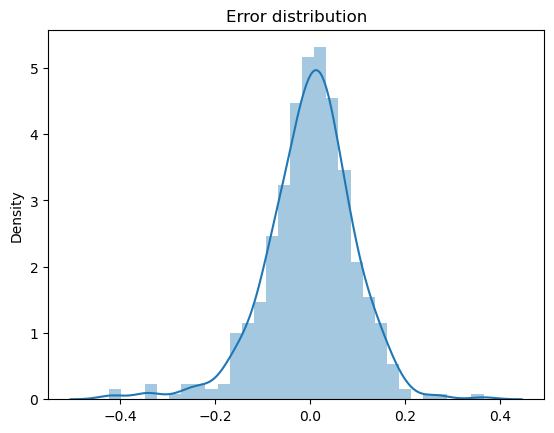

In [52]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

In [53]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [54]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
df_test[scaler_var] = scaler.transform(df_test[scaler_var])

In [55]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
#building test model using the variable temp
#preparing the variables for model building 

y_test = df_test.pop('cnt')
X_test = df_test
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [57]:
X_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [58]:
X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'Aug', 'Sep', 'Sun', 'Light Snow',
       'Mist + Cloudy', 'summer', 'winter'],
      dtype='object')

In [59]:
#dropping constant
X_train_lr5.drop(columns= 'const', inplace = True)

#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

#making predictions
y_pred = lr_model.predict(X_test_new)

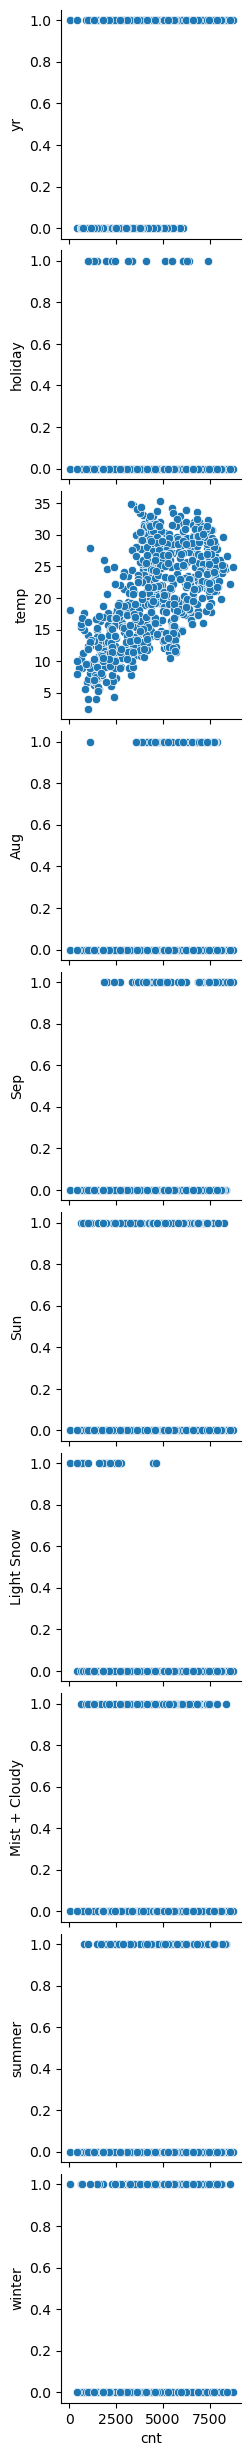

<Figure size 1600x1200 with 0 Axes>

In [60]:
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(df, y_vars=X_train_lr5.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

In [ ]:
# Points which we infer from the above plots are :-
# As we can see, temperature has a linear relationship with the dependent variable (cnt).
# As we have observed earlier every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity.
# The error distribution as observed above is normal (ie concentrated around 0) 

In [67]:
# Step 5 : Prediction and evaluation of the test set

#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.79984)*(10-1)/(10-1-1)
print('Adjusted r2 score on the test set is', Adj_r2)

r2 score on the test set is 0.7998429331697083
Adjusted r2 score on the test set is 0.7748200000000001


In [62]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.827679767267315


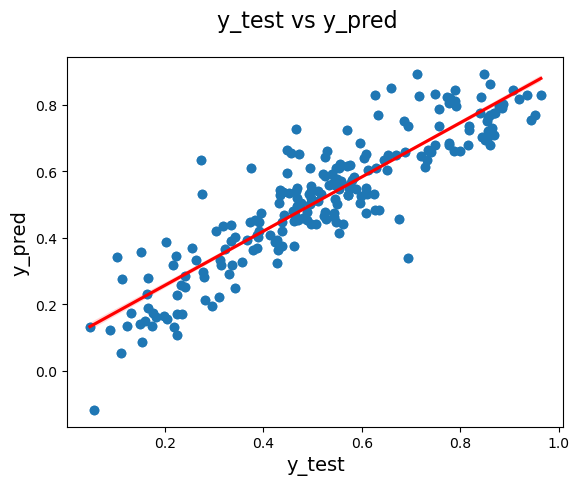

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [ ]:
# Equation of the best fitted Line is :
#  cnt = 0.2312×yr + 0.5398×temp - 0.1075×holiday + 0.1211×Sep - 0.0483×Sun 
#        - 0.3017×LightSnow - 0.0815×MistCloudy - 0.0555×Aug + 0.0958×summer + 0.1462×winter + 0.0777

In [64]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008661842976799412
Mean squared error of the test set is 0.00957036593881784


In [ ]:
# Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance 
# between in both the test and train datasets

In [ ]:
# Final Result Comparison between Train model and Test:
# - Train R^2 : 0.828
# - Train Adjusted R^2 : 0.824
# - Test R^2: 0.799
# - Test Adjusted R^2: 0.77482


In [ ]:
# Summary - Following points were summarized after performing the Multiple Linear Regression Model building for the Boombikes Casestudy
# using data interpretation, visualisation, data-preparation, model building and training, residual analysis 
# and evaluation of test model:-

# 1.The R-squared value of the train set is 82.8% whereas the test set has a value of 79.98% which suggests that our model 
#   broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

# 2.Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that 
#   the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables.
#   RFE was also conducted for automated selection of variables.

# 3.We can see that temperature variable is having the highest coefficient 0.5398, which means if the temperature increases 
#   by one unit the number of bike rentals increases by 0.5398 units. So, Boombikes can focus more on temperature factor.
#   Additionally more rentals seem to be demanded on the winters as compared to the summer and spring.
#   We had observed that the months of September and October had higher use of rentals. In terms of days the maximum 
#   focus was on days like Wed, Thurs and Sat and more on holidays.

# 4.Boombikes rentals were more in 2019 as compared to 2018, So people are getting more used to shared bikes concept and hence, 
#   usage of the shared bikes concepts will flourish more in cmoing years with people opting for this method more and more.

# 5.Negative coefficients or negative correlation with the count were seen on Holidays and Sundays, as people more want to 
#  stay at home on those days. Hence strategic and marketing offers can be provided on these days. Also, during Light snow 
#  and Mist + Cloudy weather, the bike rentals are in negative correlation, so on those days, disconts can be given.